## Factor Analysis

In [1]:
# Import necessary packages
from factor_analyzer import FactorAnalyzer
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
from factor_analyzer.factor_analyzer import calculate_kmo
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Importing the dataset
from sklearn.datasets import load_diabetes
diabetes = load_diabetes()

In [3]:
# Display the details of the dataset
print("The description of the dataset is: \n", diabetes.DESCR)
x = diabetes.data
y = diabetes.target
print("Dimension of independent variables: ", x.shape)

The description of the dataset is: 
 .. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, T-Cells (a type of white blood cells)
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, thyroid stimulating hormone
      - s5      ltg, lamotrigine
      - s6      glu, blood sugar lev

In [4]:
# Applying Bartlett's test of sphericity for determining adequacy
chisquare, p_value = calculate_bartlett_sphericity(x)
print("Chi Square value of Bartlett test: ", chisquare.round(3))
print("p-value of Bartlett test: ", p_value.round(3))

Chi Square value of Bartlett test:  3385.32
p-value of Bartlett test:  0.0


In [5]:
# Applying KMO (Kaiser-Meyer-Olkin) test for determining adequacy
kmo_values, kmo_model = calculate_kmo(x)
print("KMO model: ", kmo_model.round(3))
print("KMO values: ", kmo_values.round(3))

KMO model:  0.535
KMO values:  [0.877 0.839 0.878 0.83  0.39  0.413 0.332 0.786 0.425 0.928]


The p-value of Bartlett's test is 0, which means that it is statistically significant. The overall KMO for our data is 0.535, which is good but not excellent. The value of both the tests indicates that Factor Analysis (FA) can be executed since the condition of adequacy is met.

Kaiser criterion is an analytical approach, which is based on selecting the factor which has more significant proportion of explained variance. The eigenvalue is a good criterion for determining the optimum number of factors. Eigenvalues represent variance explained by each factor from the total variance. In general, an eigenvalue > 1 will be considered as selection criteria for the feature. Scree plot provides the visual representation of factors and eigenvalues. This helps to determine the number of factors where the curve makes an elbow.

In [6]:
# create factor analysis object and perform factor analysis
fa = FactorAnalyzer()
fa.fit(x)

FactorAnalyzer(rotation_kwargs={})

In [7]:
# determine eigenvalues
eigen_value, value = fa.get_eigenvalues()
print("Eigen values are: \n", eigen_value.round(3))
print("Values are: \n", value.round(3))

Eigen values are: 
 [4.024 1.492 1.206 0.955 0.662 0.603 0.537 0.434 0.078 0.009]
Values are: 
 [ 3.728  1.573  0.888  0.216  0.119  0.091  0.017 -0.075 -0.192 -0.289]


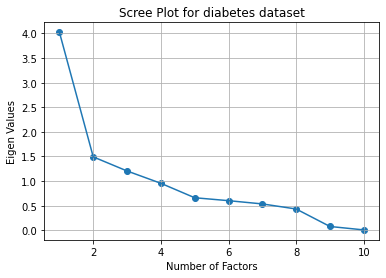

In [8]:
# create scree plot for determining optimum number of factors
plt.scatter(range(1,x.shape[1]+1), eigen_value)
plt.plot(range(1,x.shape[1]+1), eigen_value)
plt.title("Scree Plot for diabetes dataset")
plt.xlabel("Number of Factors")
plt.ylabel("Eigen Values")
plt.grid()
plt.show()

From above we can infer that eigenvalues are greater than 1 for three variables. It means we need to perform FA considering only 3 factors (unobserved variables). The above chart depicting the number of factors and eigenvalues is drawn ranging from 1 to the maximum number of variables. Hence, the range is taken 1 till x.shape[1]+1. From this we can infer that the optimum number of factors is 3.

In [9]:
# Performing factor analysis for optimum number(3) of factors
fa = FactorAnalyzer()
fa.fit(x, 3)
print("Factor loadings are: \n", fa.loadings_.round(3))

Factor loadings are: 
 [[ 0.046  0.109  0.49 ]
 [-0.071 -0.337  0.125]
 [ 0.002 -0.187  0.459]
 [-0.132  0.082  0.791]
 [ 1.026  0.29   0.138]
 [ 0.937 -0.065 -0.123]
 [ 0.17   1.127  0.182]
 [ 0.473 -0.737 -0.09 ]
 [ 0.186 -0.203  0.464]
 [ 0.038 -0.076  0.577]]


In [10]:
# Display variance of all factors
print("Variances of each factors: \n", fa.get_factor_variance())

Variances of each factors: 
 (array([2.24476785, 2.11546142, 1.71553696]), array([0.22447679, 0.21154614, 0.1715537 ]), array([0.22447679, 0.43602293, 0.60757662]))


We needed to determine the highest loading of the variable a particular factor. Here we can see that the first factor is composed of two variables: 5th and 6th variables have the highest loading on the first factor. The second factor comprises 3 variables: 2nd, 7th and 8th variables having the highest loading on the second factor. The third factor comprises 5 variables: 1st, 3rd, 4th, 9th and 10th variables having the highest loading on the third factor. Thus, we are able to reduce the 10 variables in 3 factors.

**Note** There are some limitations of Factor Analysis (FA) are controversial, its interpretationscan be debatable because more than one interpretation can be made of the same data factors. Factor identification and naming of factors require domain knowledge.

`It is not advisable to use a large number of variables in the study. All those studies which involve many variables should be reduced to small number of variables for effective interpretation.`